In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
sleep_df = pd.read_csv("../project-1/Resources/Sleep_health_and_lifestyle_dataset.csv")
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


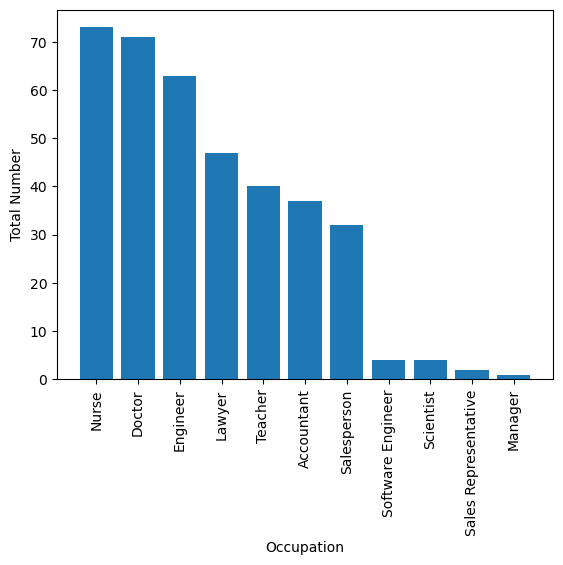

In [3]:
plt.bar(sleep_df["Occupation"].value_counts().index.values, sleep_df["Occupation"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Total Number")
plt.show()

In [4]:
value_counts = sleep_df["Occupation"].value_counts()
remove = value_counts[value_counts < 30].index
sleep_df_clean = sleep_df[~sleep_df["Occupation"].isin(remove)]
sleep_df_clean.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [5]:
occupation_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Occupation"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Occupation"])["Quality of Sleep"].mean(),
})
occupation_df

,Mean Sleep Duration,Mean Sleep Quality
Occupation,,
Accountant,7.113514,7.891892
Doctor,6.970423,6.647887
Engineer,7.987302,8.412698
Lawyer,7.410638,7.893617
Nurse,7.063014,7.369863
Salesperson,6.403125,6.000000
Teacher,6.690000,6.975000


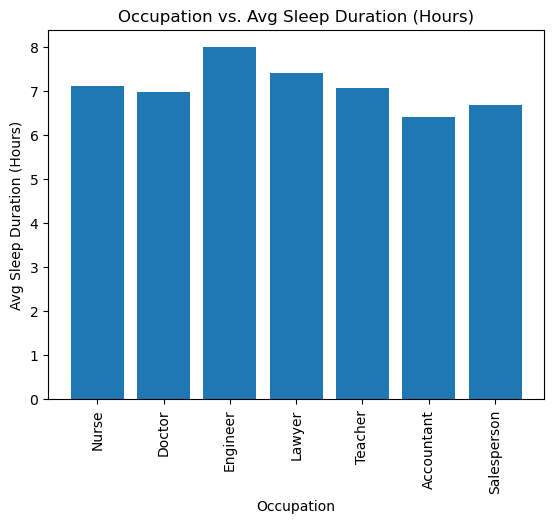

In [6]:
plt.bar(sleep_df_clean["Occupation"].value_counts().index.values, 
        sleep_df_clean.groupby(["Occupation"])["Sleep Duration"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Occupation vs. Avg Sleep Duration (Hours)")
plt.show()

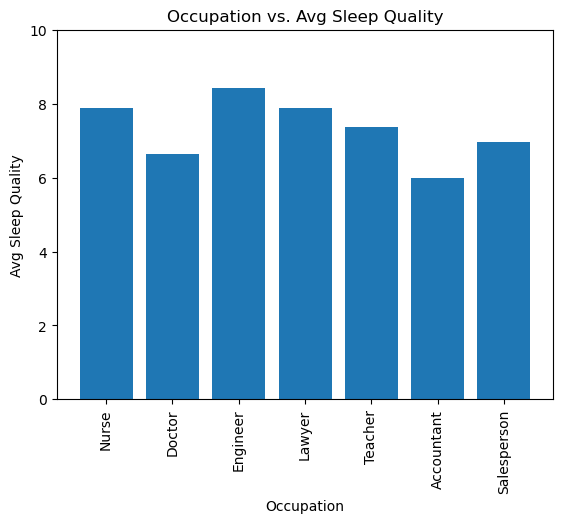

In [7]:
plt.bar(sleep_df_clean["Occupation"].value_counts().index.values ,
        sleep_df_clean.groupby(["Occupation"])["Quality of Sleep"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Avg Sleep Quality")
plt.title("Occupation vs. Avg Sleep Quality")
plt.ylim(0,10)
plt.show()

In [8]:
gender_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Gender"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Gender"])["Quality of Sleep"].mean(),
})
gender_df

,Mean Sleep Duration,Mean Sleep Quality
Gender,,
Female,7.258889,7.727778
Male,7.055191,7.010929


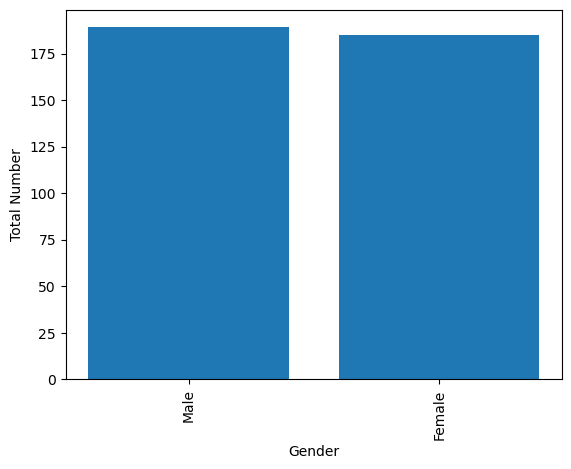

In [9]:
plt.bar(sleep_df["Gender"].value_counts().index.values, sleep_df["Gender"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Total Number")
plt.show()

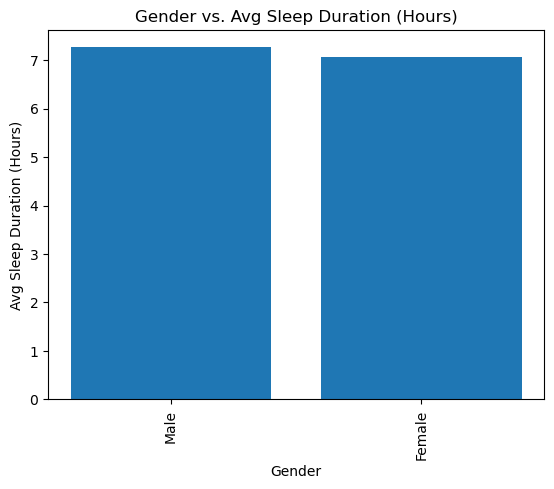

In [10]:
plt.bar(sleep_df_clean["Gender"].value_counts().index.values ,sleep_df_clean.groupby(["Gender"])["Sleep Duration"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Gender vs. Avg Sleep Duration (Hours)")
plt.show()

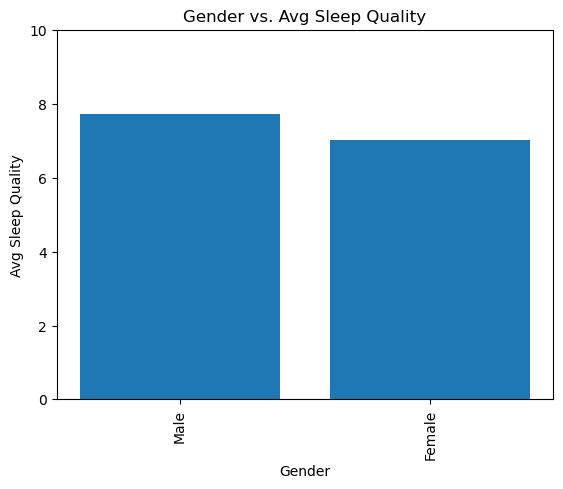

In [11]:
plt.bar(sleep_df_clean["Gender"].value_counts().index.values ,sleep_df_clean.groupby(["Gender"])["Quality of Sleep"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Avg Sleep Quality")
plt.title("Gender vs. Avg Sleep Quality")
plt.ylim(0,10)
plt.show()

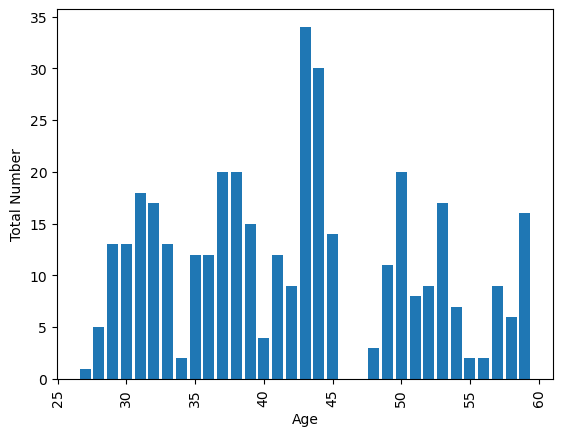

In [12]:
plt.bar(sleep_df["Age"].value_counts().index.values, sleep_df["Age"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Age")
plt.ylabel("Total Number")
plt.show()

In [13]:

bins = [0,30,40,50,60]
labels = ["Younger than 30","30 to 40","40 to 50","50 to 60"]
sleep_df_clean['Age Bracket'] = pd.cut(sleep_df_clean['Age'], bins=bins, labels=labels, include_lowest=True)

age_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Age Bracket"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Age Bracket"])["Quality of Sleep"].mean(),
})
age_df

/var/folders/63/qn1gl03j5nn2mbv8p40ykqm00000gn/T/ipykernel_21425/783718939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df_clean['Age Bracket'] = pd.cut(sleep_df_clean['Age'], bins=bins, labels=labels, include_lowest=True)


,Mean Sleep Duration,Mean Sleep Quality
Age Bracket,,
Younger than 30,7.053571,6.392857
30 to 40,7.057480,7.362205
40 to 50,6.775758,6.810606
50 to 60,8.019737,8.697368


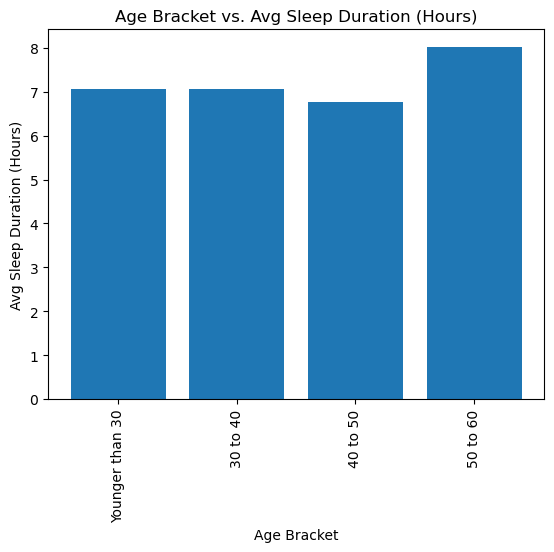

In [14]:
plt.bar(sleep_df_clean["Age Bracket"].value_counts().index.values ,sleep_df_clean.groupby(["Age Bracket"])["Sleep Duration"].mean())
plt.xticks([0,1,2,3],["Younger than 30","30 to 40","40 to 50","50 to 60"], rotation = 90)
plt.xlabel("Age Bracket")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Age Bracket vs. Avg Sleep Duration (Hours)")
plt.show()

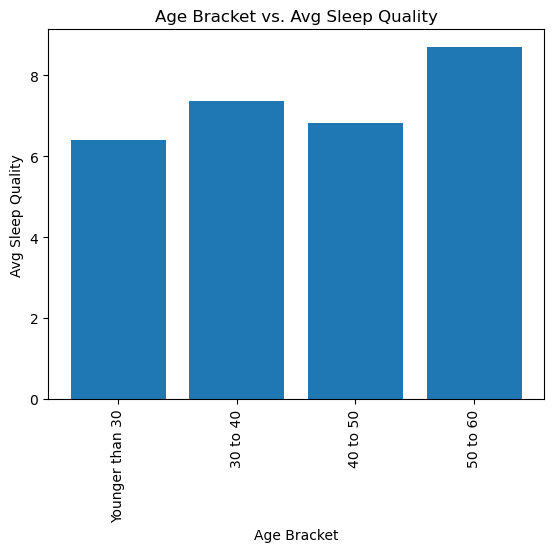

In [15]:
plt.bar(sleep_df_clean["Age Bracket"].value_counts().index.values ,sleep_df_clean.groupby(["Age Bracket"])["Quality of Sleep"].mean())
plt.xticks([0,1,2,3],["Younger than 30","30 to 40","40 to 50","50 to 60"], rotation = 90)
plt.xlabel("Age Bracket")
plt.ylabel("Avg Sleep Quality")
plt.title("Age Bracket vs. Avg Sleep Quality")
plt.show()

In [16]:
def linear(x,y,title,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-",label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(fontsize=9)
    plt.show()
    print(f"The r value is: {rvalue}")

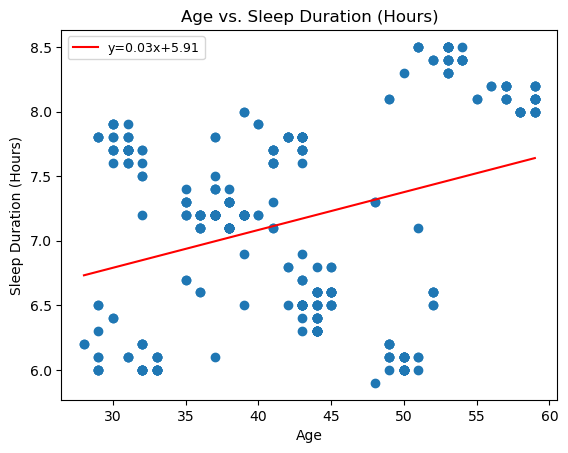

The r value is: 0.31947739857337487


In [17]:
linear(sleep_df_clean["Age"],sleep_df_clean['Sleep Duration'],"Age vs. Sleep Duration (Hours)", "Age", "Sleep Duration (Hours)")

Not an extremely strong linear relationship is present, but older subjects tended to sleep longer than younger ones.

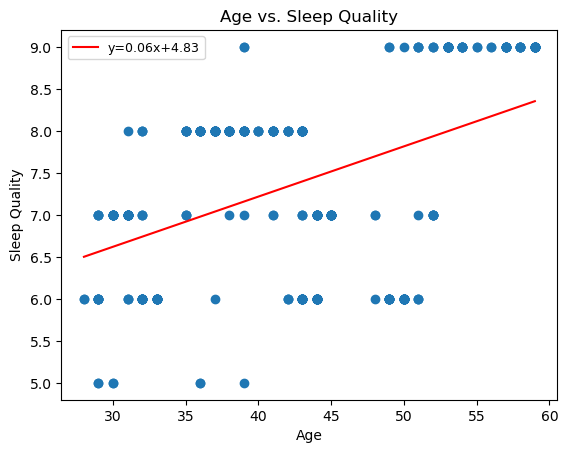

The r value is: 0.4499975170665754


In [18]:
linear(sleep_df_clean["Age"],sleep_df_clean['Quality of Sleep'],"Age vs. Sleep Quality", "Age", "Sleep Quality")

There does not appear to be a strong linear relationship between age and sleep quality, but there is some sort of relationship present where older subjects reported higher quality of sleep.

In [19]:
bins = [0,40,60,80,100]
labels = ["0 to 40","40 to 60","60 to 80","80 to 100"]
sleep_df_clean['Physical Activity Bracket'] = pd.cut(sleep_df_clean['Physical Activity Level'], bins=bins, labels=labels, include_lowest=True)

phys_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Physical Activity Bracket"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Physical Activity Bracket"])["Quality of Sleep"].mean(),
})
phys_df

/var/folders/63/qn1gl03j5nn2mbv8p40ykqm00000gn/T/ipykernel_21425/4138306793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df_clean['Physical Activity Bracket'] = pd.cut(sleep_df_clean['Physical Activity Level'], bins=bins, labels=labels, include_lowest=True)


,Mean Sleep Duration,Mean Sleep Quality
Physical Activity Bracket,,
0 to 40,7.148000,7.240000
40 to 60,6.864828,7.213793
60 to 80,7.887838,8.013514
80 to 100,6.992754,7.130435


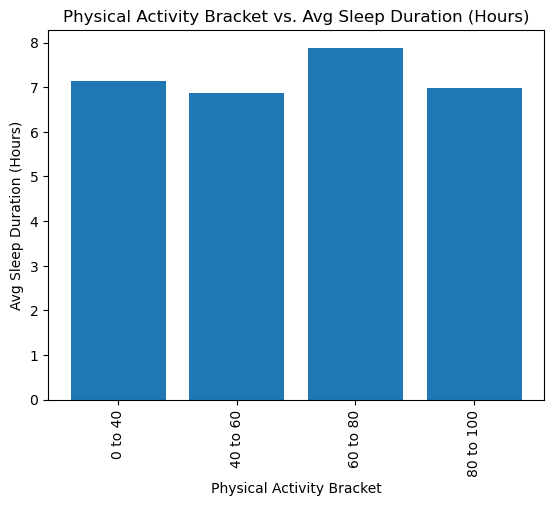

In [20]:
plt.bar(sleep_df_clean["Physical Activity Bracket"].value_counts().index.values ,
        sleep_df_clean.groupby(["Physical Activity Bracket"])["Sleep Duration"].mean())
plt.xticks([0,1,2,3],["0 to 40","40 to 60","60 to 80","80 to 100"], rotation = 90)
plt.xlabel("Physical Activity Bracket")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Physical Activity Bracket vs. Avg Sleep Duration (Hours)")
plt.show()

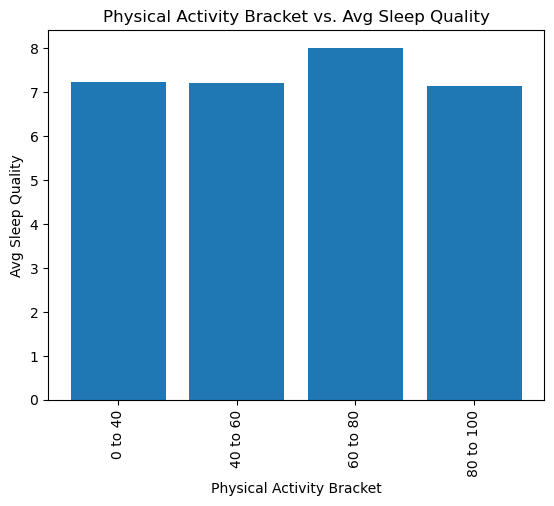

In [21]:
plt.bar(sleep_df_clean["Physical Activity Bracket"].value_counts().index.values,
        sleep_df_clean.groupby(["Physical Activity Bracket"])["Quality of Sleep"].mean())
plt.xticks([0,1,2,3],["0 to 40","40 to 60","60 to 80","80 to 100"], rotation = 90)
plt.xlabel("Physical Activity Bracket")
plt.ylabel("Avg Sleep Quality")
plt.title("Physical Activity Bracket vs. Avg Sleep Quality")
plt.show()

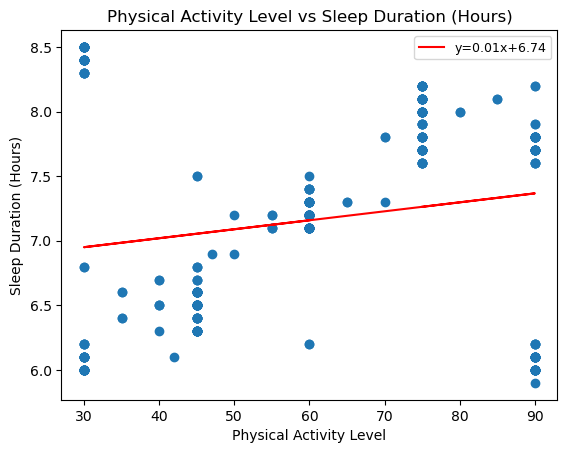

The r value is: 0.18369128406592292


In [22]:
linear(sleep_df_clean['Physical Activity Level'],
       sleep_df_clean['Sleep Duration'],
       "Physical Activity Level vs Sleep Duration (Hours)",
       "Physical Activity Level","Sleep Duration (Hours)")

Very weak linear relationship.

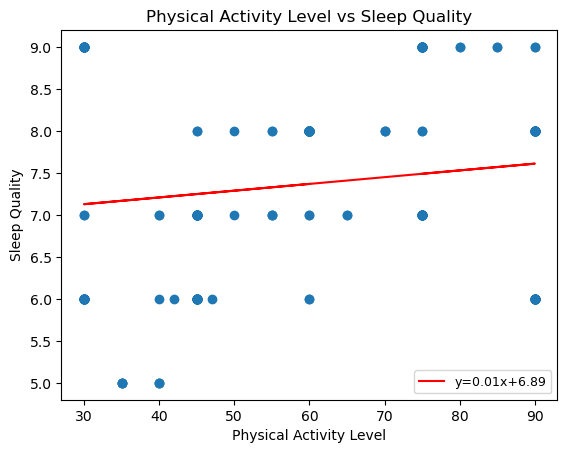

The r value is: 0.1468286388908252


In [23]:
linear(sleep_df_clean['Physical Activity Level'],
       sleep_df_clean['Quality of Sleep'],
       "Physical Activity Level vs Sleep Quality",
       "Physical Activity Level","Sleep Quality")

Also a very weak linear relationship.

In [24]:
stress_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Stress Level"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Stress Level"])["Quality of Sleep"].mean(),
})
stress_df

,Mean Sleep Duration,Mean Sleep Quality
Stress Level,,
3,8.226761,8.971831
4,7.030000,7.671429
5,7.492188,7.906250
6,7.544186,7.069767
7,6.468000,6.000000
8,6.064615,6.000000


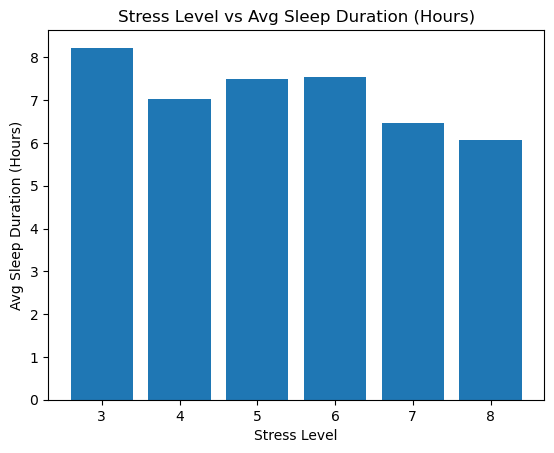

In [25]:
plt.bar(stress_df.index.values,
        stress_df['Mean Sleep Duration'])
plt.xlabel("Stress Level")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Stress Level vs Avg Sleep Duration (Hours)")
plt.show()


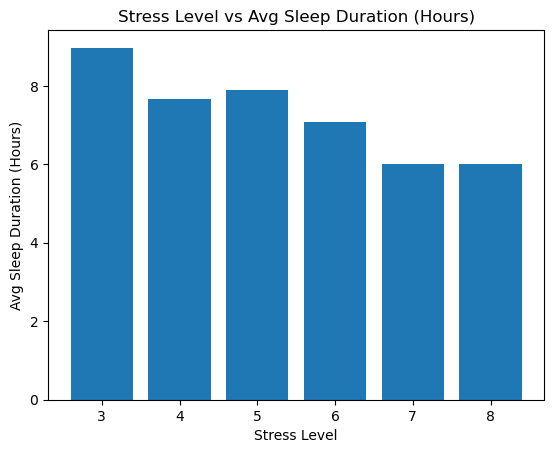

In [26]:
plt.bar(stress_df.index.values,
        stress_df['Mean Sleep Quality'])
plt.xlabel("Stress Level")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Stress Level vs Avg Sleep Duration (Hours)")
plt.show()


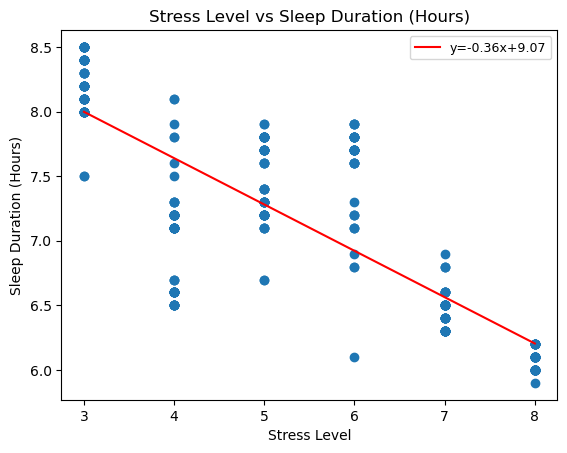

The r value is: -0.8071158601014956


In [27]:
linear(sleep_df_clean['Stress Level'],sleep_df_clean['Sleep Duration'],"Stress Level vs Sleep Duration (Hours)",
       "Stress Level", "Sleep Duration (Hours)")

There is a strong linear relationship between higher stress levels and lower duration of sleep.

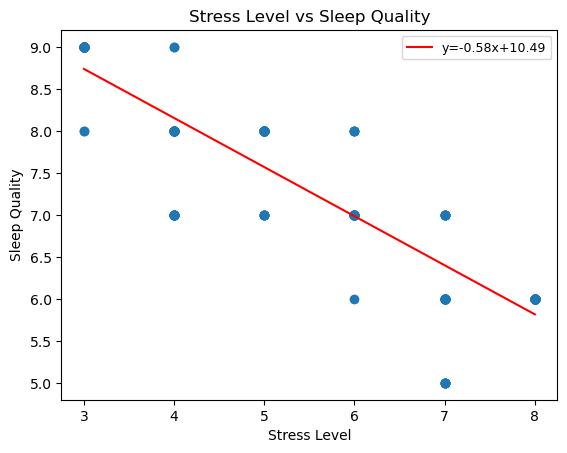

The r value is: -0.9072204322730772


In [28]:
linear(sleep_df_clean['Stress Level'],sleep_df_clean['Quality of Sleep'],"Stress Level vs Sleep Quality",
       "Stress Level", "Sleep Quality")

There is also a strong negative correlation between stress level and quality of sleep.